---
title: "Text Analysis and NLP Project:Emotion Detection from Text "
author:
  - Nastaran Mesgari

date: 2024-05-19

abstract: ""

format: 
  html:  
    code-fold: true
    standalone: true
    embed-resources: true
    number-sections: true # numbering the header
    toc: true
    toc-depth: 4
---

# Executive Summary

In this project, I pursued several objectives:

I examined the text to determine whether the sentiment it conveys is positive, negative, or neutral. We investigated the best algorithm for identifying sentiment within this dataset.
Using ChatGPT, I created a dataset with emotional elements present in the text. I categorized the information into positive, negative, and neutral labels in equal proportions and generated a balanced dataset. Then, I utilized the algorithm obtained in the first stage to evaluate them, observing how much the output is influenced by the fact that the text was generated by a machine.
Considering the methods I had observed on Kaggle for sentiment analysis, I examined my data with different scenarios and algorithms. I compared the results with those obtained by myself.


<p style="text-align: justify;">
In the first step, the texts in the comment dataset were preprocessed, which included text cleaning, tokenization, lemmatization, etc. Then the dataset was split into training and testing datasets, and they were both transformed into numerical vectors using Word2Vec word embedding algorithm. Then, several classification algorithms such as logistic regression, decision tree, and LSTM were trained on the training dataset and were tested on the test dataset. Regarding the evaluation metrics, the classifiers' performance was relatively poor.
</p>


<p style="text-align: justify;">
In the next object, chatGPT language model was used to generate texts, and the texts were labeled by Sentiments. Then, the dataset was cleaned using the same preprocessing steps and was transformed into numerical vevtors using the the word2vec model which was trained on the tweet_Comments dataset. Finally, the same classifier algorithms were used to predict the Sentiment on the dataset. In this part, once the classifiers which were trained on the dataset were used and again the chatgpt dataset was divided into train and test datasets and the classifiers were trained usding the training dataset and the used to predict on the test dataset.</p> ** The classifiers trained on tweet-comments dataset had better performance than those trained on chatGPT dataset.**

<p style="text-align: justify;">
What was found from this analysis is that various methods can be employed to discern sentiments from text. However, in this approach, the best-performing algorithm is related to LDA. Contrary to the assumption that sentiment detection might be more discernible when generated by artificial intelligence, here, we observed a lower accuracy with the LDA( from 52 to 48 in accuracy for chatgpt data set) algorithm, while the algorithm derived from real user comments yielded better results. 

Furthermore, the use of TF-IDF for feature engineering facilitated swift algorithm evaluation, underscoring the efficiency of this approach in handling textual data. However, it's essential to note the significant time investment required for implementing techniques like Word2Vec, indicating the importance of balancing computational resources with performance gains.
and this step between 3 algorithm by using TF-IDF the SVD is better than the MVP and MNB , it is about 59 in accuracy.and the same as LDA by using word2vec model.

Overall, the project sheds light on the diverse landscape of sentiment analysis techniques, emphasizing the need for continuous exploration and adaptation to effectively extract insights from textual data in various contexts.
</p>


# Introduction
In this project, the primary objective was to explore various methods for sentiment analysis on textual data. Sentiment analysis plays a crucial role in understanding public opinion, customer feedback, and user sentiments across various platforms. With the advent of advanced natural language processing (NLP) techniques and machine learning algorithms, extracting sentiment from text has become increasingly feasible and valuable.

The project encompasses several key components:

**Text Sentiment Analysis**: The initial focus was on examining textual data to determine whether it conveys positive, negative, or neutral sentiments. Various algorithms and approaches were explored to identify the most effective method for sentiment analysis within the dataset.

**Dataset Creation with Emotional Elements:** Utilizing ChatGPT, a dataset was generated containing text with emotional elements. This dataset was carefully labeled with sentiments categorized as positive, negative, or neutral in equal proportions, ensuring a balanced representation of emotional states.

**Algorithm Evaluation:** The sentiment analysis algorithm obtained in the first stage was applied to evaluate the dataset. Notably, this evaluation included an investigation into how the output is influenced by the fact that the text was generated by a machine, thereby assessing the algorithm's robustness and generalizability.

**Comparative Analysis:** Drawing insights from methods observed on platforms like Kaggle, the project involved a comparative analysis of different scenarios and algorithms for sentiment analysis. The results obtained from these analyses were compared with those derived internally.

The project involved rigorous preprocessing of textual data, including tasks such as text cleaning, tokenization, lemmatization, and numerical vectorization using advanced techniques like Word2Vec word embedding. Classification algorithms, including logistic regression, decision trees, and Long Short-Term Memory (LSTM) networks, were trained and evaluated on the transformed datasets.


**Details about the dataset:**
- This public domain dataset is collected from data.world platform, shared by @crowdflower, a data enrichment, mining and crowdsourcing company based in the US.
- The dataset consists of 40000 records of tweets labelled with 13 different sentiments, followed by Tweet ID number.
- All data types are strings, except for the 'tweet ID' column, which is an integer.
- There is a class imbalance of <21.32%. Tweets primarily convey neutral and negative sentiments.
- Contains 172 duplicate rows (tweets) but categorised with different sentiment labels.
- Word lengths vary, ranging from a minimum of 1 word to a maximum of 16 words.
- The data exhibits some degree of disorder and lack of cohesion. Various linguistic patterns used to express sentiment.
- Some information contains only special characters or hyperlinks.
- Contains informal and colloquial terms. For instance, “peeps” is a friendly term for “People”.
- Contains self-made terms, slangs or misspellings such as “Humpalow”.

### importing libraries

In [1]:
import pandas as pd
import numpy as np

import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import load_files
# nltk.download('stopwords')
import pickle
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.naive_bayes import MultinomialNB

import keras
#from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau 

from nltk.corpus import stopwords
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')
from nltk.tokenize import sent_tokenize

from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, average_precision_score, recall_score, precision_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Reading the data
df = pd.read_csv('Data/text_emotion.csv')
df.head(10)

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,nic0lepaula,@charviray Charlene my love. I miss you
9,1956969172,sadness,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?


### Data Exploration
It involves exploring the characteristics of a dataset to gain insights and inform further analysis.

In [3]:
# Information of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


we do not have any missing value

Text(0.5, 1.0, 'Missing value in the dataset')

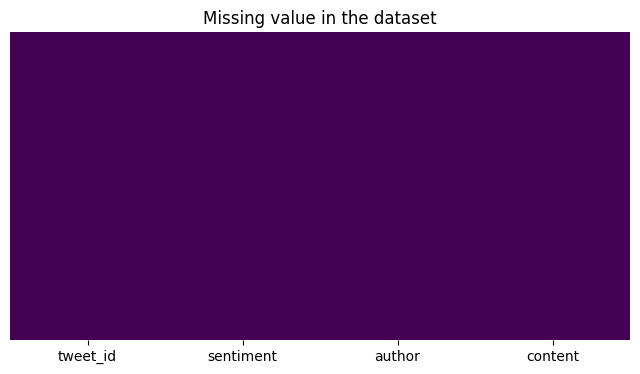

In [4]:
#plotting missing values 
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

check the uniqe value in sentiment column. we have 13 category for the sentiment column.

In [5]:
# Unique values from 'sentiment'
unique_sentiments = df['sentiment'].unique()
print(unique_sentiments)

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


checking the frequency distribution of sentiment for finding the balancing

In [6]:
# Frequency distribution of'sentiment'
frequency_counts = df['sentiment'].value_counts()

frequency_percentage = (frequency_counts / len(df['sentiment'])) * 100
frequency_df = pd.DataFrame({'Counts': frequency_counts, 'Percentage': frequency_percentage})

print(frequency_df)

# Print total value
cardinality = df['sentiment'].nunique()
print(f"\ntotal values: {cardinality}")

            Counts  Percentage
sentiment                     
neutral       8638     21.5950
worry         8459     21.1475
happiness     5209     13.0225
sadness       5165     12.9125
love          3842      9.6050
surprise      2187      5.4675
fun           1776      4.4400
relief        1526      3.8150
hate          1323      3.3075
empty          827      2.0675
enthusiasm     759      1.8975
boredom        179      0.4475
anger          110      0.2750

total values: 13


Regarding the below countplot based on the sentiment, it can be seen than the dataset is imbalanced.and tweet are more about negative and neutral .

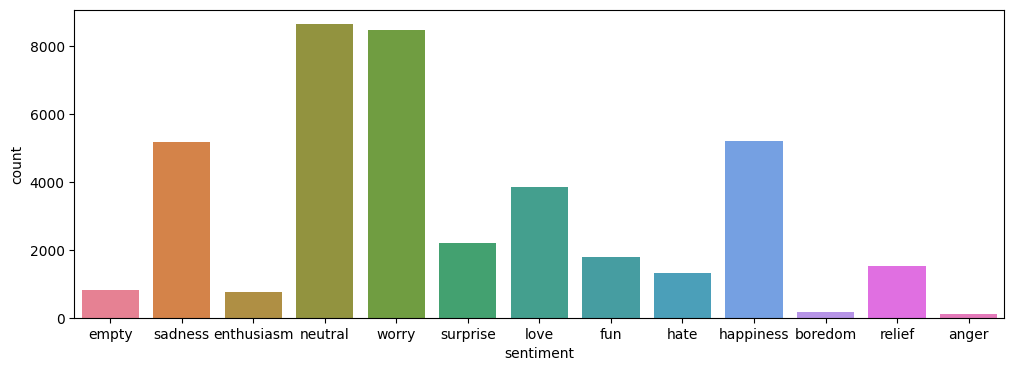

In [7]:
plt.figure(figsize=(12,4));
sns.countplot(x='sentiment', data=df, palette='husl');

for balancing the data I selected 3 groups , Posetive , Negative and Neutral.Surprise sentiment was selected as a neutral because it is not be shown:  is it posetive or negative and when I do that the prevalence ≤ 10% and it is considered for imbalancing data.I created a new column and the name is label for mapping the sintiment.


In [8]:
#  grouping 13 labels into 3 classes: 'negative', 'positive', 'neutral'
sentiment_mapping = {
    'empty': 'negative',
    'sadness': 'negative',
    'worry': 'negative',
    'hate': 'negative',
    'boredom': 'negative',
    'anger': 'negative',
    'enthusiasm': 'positive',
    'neutral': 'neutral',
    'surprise': 'neutral',
    'love': 'positive',
    'fun': 'positive',
    'happiness': 'positive',
    'relief': 'positive'
}

# Create a new col for the mapping
df['label'] = df['sentiment'].map(sentiment_mapping)

Using this code to obtain the lengths of words in texts can help us gain a better understanding of textual data. Information such as the average length of texts can indicate to us how much the average number of words or the average length of texts is, which can be useful in decisions related to text processing and analysis. For example, if the average length of texts is very large or very small, there may be a need to adjust model parameters or use different methods in text processing. Additionally, this information can be used to determine more specific needs such as allocating computational resources or memory for text processing.

In addition,I check out the average lendth of the Comments are approximately 73.5 words.

In [9]:
# Size of the texts
total_length = 0
num_texts = len(df['content'])
for text in df['content']:
    total_length += len(text)

avg_length = total_length / num_texts

print(f"The average length of the texts is {avg_length}")

The average length of the texts is 73.40555


# Text Pre-processing
The text pre-processing is a very critical step because better results can only be achieved with good quality of data. Since the tweets texts are unstructured or in other words, they are raw and very noisy, they require cleaning. The main objective of this step is to remove noisy and inconsistent texts. Comments that carry very little weighting in text context, for example numbers, special character, punctuations, hashtags, extra blank space, etc. need to be removed. The following steps are taken for the text cleaning.

### Removing special characters and lowercasing
Unstructured texts such as Comments may contain numbers, special characters, punctuations, hashtags, extra blank space, etc. We need to remove them from the texts. Therefore, I This function performs the following steps:

**removing any word which starts with @.**

**removing all non-alphabetic characters in the string with spaces.**

**changing all the letters into lower case.**

**replacing more than one space with one space and removing any leading and trailing space.**

**iltering out any punctuation marks from the text.**

### Tokenization
Tokenization involves dividing a text or document into smaller elements known as tokens, aiming to transform continuous text into distinct units for computer processing. It's an essential process in natural language processing and text analysis, facilitating various algorithms and methods that rely on tokenized data. In my approach, I utilized the wordpunct_tokenize() function from NLTK library, which efficiently separates text into individual tokens or words by identifying non-alphanumeric characters like punctuation marks or special symbols.

### Removing Numbers
Eliminating numbers from text during text analysis can be crucial, especially considering the context and objectives of the analysis. Given that the project involves comments and tweets, with a focus on language patterns, numbers might not contribute significantly to the analysis. Thus, excluding numbers can enhance the consistency of the text. Following tokenization, I filtered out any tokens identified as digits.

### Removing stop-words
Stop words, such as "the", "a", "an", "and", "but", "in", "on", etc., are highly common in language and typically add little substantive meaning. Conversely, non-stop words, encompassing nouns, verbs, adjectives, adverbs, and other significant parts of speech, carry more weight in conveying meaning. In text analysis, filtering out stop words can enhance the relevance and clarity of the analysis. To achieve this, I compared each word in the Comments texts with NLTK's pre-defined English stop words list, retaining only the non-stop words for further analysis.

### English Language detection
Ensuring that the texts are in English is vital for achieving accurate and effective text analysis. Since numerous NLP techniques and tools are tailored to specific languages, particularly English, analyzing English text enables the utilization of language-specific resources and models. To accomplish this, I implemented a filter on the tokenized texts, verifying whether each token belongs to the set of English words sourced from the nltk.corpus.words module.


###  lemmatizing the words
Lemmatization simplifies words to their base or root form, known as the "lemma," aiming to unify inflectional and sometimes derivational variations of a word. This process reduces the total number of unique words in a text, aiding in text analysis by standardizing vocabulary and mitigating data sparsity. For this project, I employed NLTK's WordNetLemmatizer as the lemmatization tool, which utilizes morphological analysis and part-of-speech tagging to identify the base form of a word. Considering the part-of-speech is crucial, as the lemma may vary based on whether the word functions as a noun, verb, adjective, or adverb.


# Cleaning the Dataset 

In [10]:
dfcopy = df.copy()

I found the numerical column for removing because it wasn't necessary in the process of the text analytics. 

In [11]:
# Find any numerical variables.
numerical = [var for var in dfcopy.columns if dfcopy[var].dtype!='O']

print('Num of numerical variables: {}\n'.format(len(numerical)))
print('The numerical variables are: ', numerical)

Num of numerical variables: 1

The numerical variables are:  ['tweet_id']


In [12]:
# Drop the unecessary column (numerical variables)
dfcopy= dfcopy.drop(columns=['tweet_id'])

in this step we remove the duplicate rows, it be showned 13 rows.

In [13]:
# Count duplicates
duplicates_count = dfcopy.duplicated().sum()
print(f'Total duplicated rows: {duplicates_count}')

Total duplicated rows: 13


In [14]:
# Check for duplicates
dfcopy[dfcopy['content'].duplicated() == True]

,sentiment,author,content,label
366,worry,jmil1733,I feel so deflated. No more doggy.,negative
521,worry,Chassidy7,Somebody please save the polar bears!,negative
1026,neutral,benmfowler,I'm at work,neutral
3684,sadness,nnurse,@dublins98dave me too! I am down 400 euro,negative
4363,worry,becca4656,"is upset, I left my phone at home again",negative
...,...,...,...,...
39859,love,Miamarie33,Happy Mothers Day,positive
39898,love,xoxodominique,happy mothers day!,positive
39913,happiness,wailanik,happy mother's day!,positive
39915,love,ennahdii,happy mother's day everyone,positive


in this step I reindex the data set

In [15]:
# Drop duplicated values
index = dfcopy[dfcopy['content'].duplicated() == True].index
dfcopy.drop(index, axis = 0, inplace = True)
dfcopy.reset_index(inplace=True, drop = True)

after remove the duplicate rows we have 39827 rows with three columns

In [16]:
# Final shape of data after dropping duplicates
dfcopy.shape
#dfcopy.info

(39827, 4)

In [17]:
# Drop the original column, 'sentiment'
#dfcopy = dfcopy.drop(columns=['sentiment'])

After creating a "label" column to examine the balance of frequencies related to the "label" column, I investigated it.

In [18]:
# Calculate the frequency distribution of 'sentiment'
frequency_counts = dfcopy['label'].value_counts()

frequency_percentage = (frequency_counts / len(df['label'])) * 100
frequency_df = pd.DataFrame({'Counts': frequency_counts, 'Percentage': frequency_percentage})

print(frequency_df)

# Total value count
cardinality = df['label'].nunique()
print(f"\ntotal values: {cardinality}")

          Counts  Percentage
label                       
negative   16024     40.0600
positive   13024     32.5600
neutral    10779     26.9475

total values: 3


In [19]:
# Final check - Extract unique values from 'sentiment'
unique_sentiments = dfcopy['label'].unique()
print(unique_sentiments)

['negative' 'positive' 'neutral']


As depicted in the graph, the frequency of negative instances is the highest, while positive instances are the lowest. However, since this difference is less than 10 percent, we consider it as balanced.

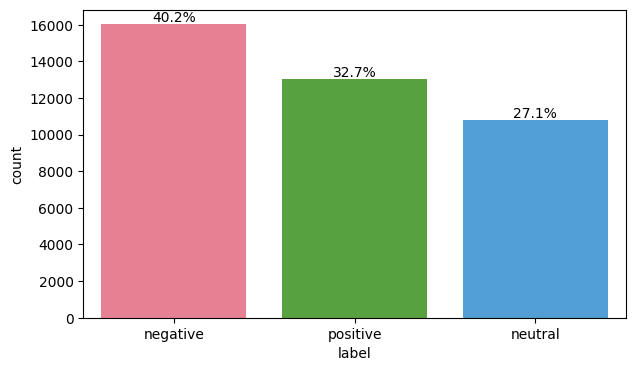

In [20]:

# DataFrame and countplot code
plt.figure(figsize=(7,4))
ax = sns.countplot(x='label', data=dfcopy, palette='husl')

# Calculate total number of data points
total = len(dfcopy['label'])

# Annotate each bar with its percentage
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()




for the statistical method, I mapped the label to an integer and I dropped the label column because it is not necessary.

In [21]:
# Mapping sentiment num / encode
dfcopy["label_num"] = dfcopy.label.map({
    'negative': 0,
    'positive': 1,
    'neutral': 2
})

dfcopy = dfcopy.drop(columns=['label'])
dfcopy.head(5)

,sentiment,author,content,label_num
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,0
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,0
2,sadness,coolfunky,Funeral ceremony...gloomy friday...,0
3,enthusiasm,czareaquino,wants to hang out with friends SOON!,1
4,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,2


I check the columns to be sure the column in content has label in label_num and we dont have missing data.and both of them have 39827 rows.

In [22]:
X = dfcopy['content']
y = dfcopy['label_num']

# Making sure that X y have the same length
print(len(X))
print(len(y))

39827
39827


In [23]:
dfcopy.columns

Index(['sentiment', 'author', 'content', 'label_num'], dtype='object')

for increasing the process of cleaning the data I devid the data set in 2 parts.

In [24]:
# Deviding the dataset into 2 parts
part_1 = dfcopy.iloc[0:20000,:]
part_2 = dfcopy.iloc[20000:39827,:]
print(part_1)

        sentiment       author  \
0           empty   xoshayzers   
1         sadness    wannamama   
2         sadness    coolfunky   
3      enthusiasm  czareaquino   
4         neutral    xkilljoyx   
...           ...          ...   
19995       worry       AP2005   
19996        love   rissastory   
19997     neutral    kridrules   
19998   happiness       isabuu   
19999   happiness    gAllethOo   

                                                 content  label_num  
0      @tiffanylue i know  i was listenin to bad habi...          0  
1      Layin n bed with a headache  ughhhh...waitin o...          0  
2                    Funeral ceremony...gloomy friday...          0  
3                   wants to hang out with friends SOON!          1  
4      @dannycastillo We want to trade with someone w...          2  
...                                                  ...        ...  
19995  I just want this semester to be over! Only a w...          0  
19996  listening to i can't wai

This code provides a function called "lemmatize" which is responsible for converting words into their common root forms (lemmatization). It utilizes the "WordNetLemmatizer" from the NLTK library to perform lemmatization.

The function first determines the Part-of-Speech (POS) tags for each input word. Then, it uses a dictionary to convert these tags into the required format by the "WordNetLemmatizer". Subsequently, for each word, the common root is obtained using the "lemmatize" function from the "WordNetLemmatizer" and stored in a list. Finally, the list containing the common roots is returned as the output of the function.

Having common root forms for words in the text helps us improve text processing and analysis by reducing ambiguities, enhancing semantic understanding, reducing data size, and facilitating text preprocessing tasks, ultimately leading to better performance in various text-related tasks such as classification or named entity recognition.

In [25]:
lemmatizer = WordNetLemmatizer()
def lemmatize(tokens):
    pos_tags = pos_tag(tokens)
    wn_pos_tags = {'N': 'n', 'V': 'v', 'R': 'r', 'J': 'a'}
    
    # Lemmatize each word based on its POS tag
    lemmas = []
    for token, pos in pos_tags:
        pos = wn_pos_tags.get(pos[0].upper(), 'n')  # If the POS tag is not recognized, default to noun (n)
        lemma = lemmatizer.lemmatize(token, pos=pos)
        lemmas.append(lemma)
    return lemmas

This code provides a function called "text_cleaner" that preprocesses text for use in other text processing tasks. The function employs several preprocessing steps to clean the input text and make it more usable for various text processing tasks:

Remove words starting with '@'.
Replace non-alphabetic and non-numeric characters with spaces.
Convert all letters to lowercase.
Remove extra spaces.
Tokenize the text.
Remove digits.
Remove words not found in the dictionary or identified as stop words.
Lemmatize the words.
Convert the list of tokens back to text.
These steps collectively aim to refine the text data for further analysis and processing tasks.

In [26]:
# Text Processing in a single code
#import nltk
#nltk.download('words')

words = set(nltk.corpus.words.words())
def text_cleaner(contents):
    contents = " ".join(filter(lambda x: x[0]!= '@' , contents.split())) # removes any word which starts with @.
    contents = re.sub('[^0-9a-zA-Z]', ' ', contents) # substitute all non-alphabetic characters in the string with spaces.
    contents = contents.lower() # lowercasing
    contents = re.sub(' +', ' ', contents).strip() # replacing more than one space with 1 space and remove any leading and trailing space.
    contents = nltk.wordpunct_tokenize(contents)
    contents = [word for word in contents if not word.isdigit()]
    contents = [word for word in contents if word.lower() in words or not word.isalpha()]
    contents = [word for word in contents if not word in set(stopwords.words('english'))] # Keeping only the non-stop words in the string
    contents = lemmatize(contents)
    contents = " ".join(contents)
    return contents

Now I use the function for the content column and create new column , that name is clean_content.this section  time_consuming is about 10 minuts.

In [27]:
part_1.loc[:, 'clean_content'] = part_1['content'].apply(text_cleaner)


C:\Users\Nastaran\AppData\Local\Temp\ipykernel_20344\3514124814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_1.loc[:, 'clean_content'] = part_1['content'].apply(text_cleaner)


In [28]:
part_2.loc[:, 'clean_content'] = part_2['content'].apply(text_cleaner)


C:\Users\Nastaran\AppData\Local\Temp\ipykernel_20344\385989757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_2.loc[:, 'clean_content'] = part_2['content'].apply(text_cleaner)


In [29]:
cleandf = pd.concat([part_1, part_2])


In [30]:
cleandf.info

<bound method DataFrame.info of         sentiment         author  \
0           empty     xoshayzers   
1         sadness      wannamama   
2         sadness      coolfunky   
3      enthusiasm    czareaquino   
4         neutral      xkilljoyx   
...           ...            ...   
39822     neutral  showMe_Heaven   
39823        love       drapeaux   
39824        love       JenniRox   
39825   happiness       ipdaman1   
39826        love    Alpharalpha   

                                                 content  label_num  \
0      @tiffanylue i know  i was listenin to bad habi...          0   
1      Layin n bed with a headache  ughhhh...waitin o...          0   
2                    Funeral ceremony...gloomy friday...          0   
3                   wants to hang out with friends SOON!          1   
4      @dannycastillo We want to trade with someone w...          2   
...                                                  ...        ...   
39822                                 

In [31]:
tokenized_text = []
for i in cleandf['clean_content']:
    x =  word_tokenize(i)
    tokenized_text.append(x)
cleandf['tokenized'] = tokenized_text

### Investigating Stopwords in Text

for better finding the dataset I check the stop word and count it 

In [32]:
# Count stopwords present in the data
#nltk.download('punkt')
def count_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    return len(set(words) & stop_words)

# Add a new col 'stop_words' that contains the count of stopwords
cleandf['stop_words'] = cleandf['content'].apply(count_stopwords)
value_counts = cleandf['stop_words'].value_counts()

In [33]:
# Count the number of stopwords in the data
temp = cleandf.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & stop_words))

# Print rows that contain stopwords
rows_with_stopwords = temp[temp['stop_words'] > 0]
print(rows_with_stopwords)

        sentiment         author  \
0           empty     xoshayzers   
1         sadness      wannamama   
3      enthusiasm    czareaquino   
4         neutral      xkilljoyx   
5           worry  xxxPEACHESxxx   
...           ...            ...   
39819     neutral    _Alectrona_   
39820     neutral     bushidosan   
39823        love       drapeaux   
39824        love       JenniRox   
39826        love    Alpharalpha   

                                                 content  label_num  \
0      @tiffanylue i know  i was listenin to bad habi...          0   
1      Layin n bed with a headache  ughhhh...waitin o...          0   
3                   wants to hang out with friends SOON!          1   
4      @dannycastillo We want to trade with someone w...          2   
5      Re-pinging @ghostridah14: why didn't you go to...          0   
...                                                  ...        ...   
39819  @jasimmo Ooo showing of your French skills!! l...          2   

In [34]:
# Explore tweet that contains stopwords
cleandf['content'][7]
cleandf.loc[7]

sentiment                                       worry
author                                       mcsleazy
content          Hmmm. http://www.djhero.com/ is down
label_num                                           0
clean_content                                        
tokenized                                          []
stop_words                                          2
Name: 7, dtype: object

In [35]:
# Count stopwords in index 7
stop_words = set(stopwords.words("english"))
cleandf_indx = cleandf['content'][7]
stopword_count = len([word for word in cleandf_indx.split() if word in stop_words])
stopword_count

2

In [36]:
# Print all the stopwords in index 7
stopwords_in_content = [word for word in cleandf_indx.split() if word in stop_words]

print("Stopwords in df['content'][7]:")
print(stopwords_in_content)


Stopwords in df['content'][7]:
['is', 'down']



<p style="text-align: justify;">
After text pre-processing, I removed these NaN or duplicate values from dataset. The shape of the dataset reduces into 39827.
</p>

In [37]:
print('The number of NaN-values in the pre-processed dataset is: ', cleandf['content'].isnull().sum())


The number of NaN-values in the pre-processed dataset is:  0


In [38]:
cleandf.loc[cleandf['content'].isnull()].head

<bound method NDFrame.head of Empty DataFrame
Columns: [sentiment, author, content, label_num, clean_content, tokenized, stop_words]
Index: []>

In [39]:
cleandf.shape



(39827, 7)

In [40]:
# Drop the unecessary column 
cleandf= cleandf.drop(columns=[ 'stop_words', ])

In [41]:
#| include: False
cleandf.dropna(axis = 0, inplace = True)
cleandf.shape

(39827, 6)

In [42]:
cleandf.loc[cleandf['clean_content'].isnull()].head()

,sentiment,author,content,label_num,clean_content,tokenized


# Data Visualisation
###  Comparing the text length with boxplot and histogram
In this phase of the project, I examined comment lengths across different label categories by introducing the `content_length` variable to the dataset. Upon analyzing the statistical information of this column, it became apparent that some comments exceed 120 words, although their frequency is relatively low compared to the dataset size. To enhance visualization clarity in the box plot and histogram representations of the `content_length` variable, I opted to filter out comments containing more than 120 words. However, despite this preprocessing step, neither the box plot nor the histogram revealed any significant differences among the label categories.

In [43]:
cleandf['content_length'] = cleandf['content'].str.len()
cleandf['tokenized_length'] = cleandf['tokenized'].str.len()
cleandf['clean_content_length'] = cleandf['clean_content'].str.len()
cleandf.head()

,sentiment,author,content,label_num,clean_content,tokenized,content_length,tokenized_length,clean_content_length
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,0,know bad habit part,"[know, bad, habit, part]",92,4,19
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,0,n bed headache call,"[n, bed, headache, call]",60,4,19
2,sadness,coolfunky,Funeral ceremony...gloomy friday...,0,funeral ceremony gloomy,"[funeral, ceremony, gloomy]",35,3,23
3,enthusiasm,czareaquino,wants to hang out with friends SOON!,1,soon,[soon],36,1,4
4,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,2,want trade someone one,"[want, trade, someone, one]",86,4,22


In [44]:
cleandf.shape

(39827, 9)

In [45]:
cleandf['clean_content_length'].describe()

count    39827.000000
mean        28.827002
std         18.339489
min          0.000000
25%         14.000000
50%         26.000000
75%         41.000000
max        108.000000
Name: clean_content_length, dtype: float64

In [46]:
# Size of the clean_content
total_length = 0
num_texts = len(cleandf['clean_content'])
for text in cleandf['clean_content']:
    total_length += len(text)

avg_length = total_length / num_texts

print(f"The average length of the texts is {avg_length}")

The average length of the texts is 28.827001782710223


In [47]:
# Size of the content
total_length = 0
num_texts = len(cleandf['content'])
for text in cleandf['content']:
    total_length += len(text)

avg_length = total_length / num_texts

print(f"The average length of the texts is {avg_length}")

The average length of the texts is 73.53082079995983


In [48]:
# Size of the tokenized
total_length = 0
num_texts = len(cleandf['tokenized'])
for text in cleandf['tokenized']:
    total_length += len(text)

avg_length = total_length / num_texts

print(f"The average length of the texts is {avg_length}")

The average length of the texts is 5.262409922916614


In [49]:
cleandf[cleandf['clean_content_length']>28].shape

(17976, 9)

<p style="text-align: justify;">
The below boxplots show that the length of the texts in all sentiment  have almost the same distribution .

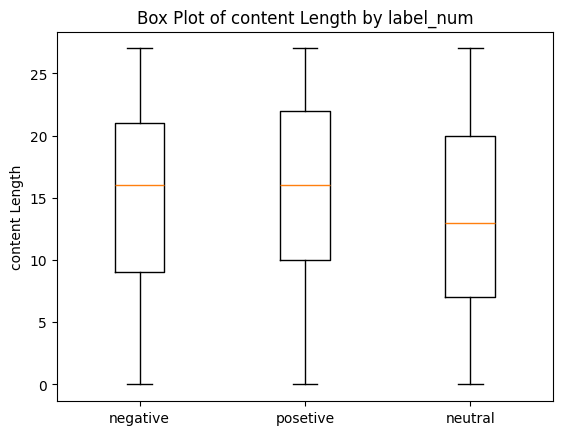

In [50]:
# Boxplots of text lenghth
plt.figsize = (9,3)
filtered_content = cleandf[cleandf['clean_content_length'] < 28]

negative_lengths = filtered_content[filtered_content['label_num'] == 0]['clean_content_length']
posetive_lengths = filtered_content[filtered_content['label_num'] == 1]['clean_content_length']
neutral_lengths = filtered_content[filtered_content['label_num'] == 2]['clean_content_length']
plt.boxplot([negative_lengths, posetive_lengths ,neutral_lengths], labels=['negative', 'posetive','neutral'])
plt.ylabel('content Length')
plt.title('Box Plot of content Length by label_num')
plt.show()



the expression filtered_content['label_num'] == 0]['clean_content'].size means "the number of values that satisfy the condition 'label_num' equals 0, in the 'clean_content' column and so on.

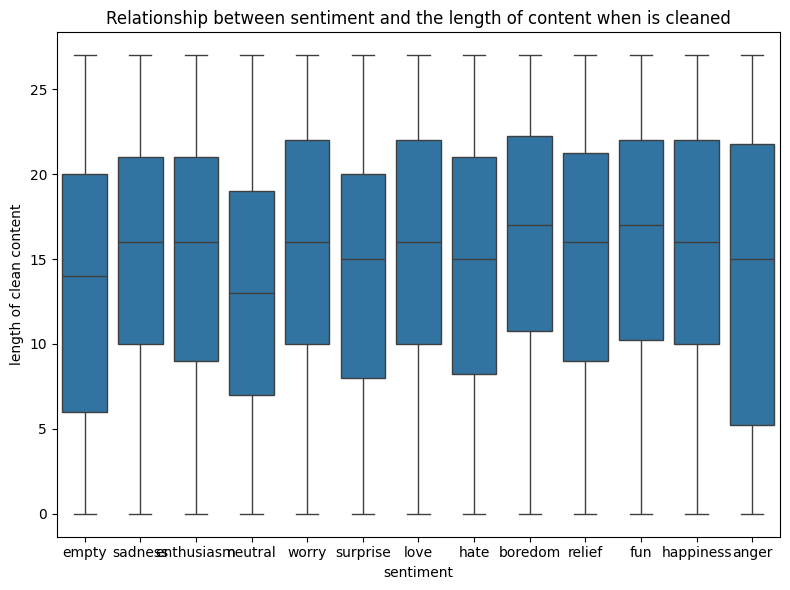

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='clean_content_length', data=filtered_content)
plt.xlabel('sentiment')
plt.ylabel('length of clean content')
plt.title('Relationship between sentiment and the length of content when is cleaned')
plt.tight_layout()
plt.show()

when the label is negative most sentiment is worry and sadness, and when it is positive most sentiment is happiness nad love and when label is neutral the most sentiment is neuteral and a littel surprise in this categories we selakted and labeled

In [52]:
import plotly.express as px
fig = px.histogram(filtered_content, x="label_num", color="sentiment", title="<b>Relationship between label num and clean content</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Word Cloud
<p style="text-align: justify;">
The word clouds for each label category (positive, negative, neutral) visually showcase the most prevalent words within their respective comments. Utilizing varying font sizes, the word clouds emphasize the frequency of each word, enabling quick recognition of prominent patterns or trends. Interestingly, negative comments exhibit recurrent words like "go" and "work," indicating prevalent sentiments, while positive comments lack similarly prominent terms, suggesting a more diverse vocabulary in expressing positivity.
</p>

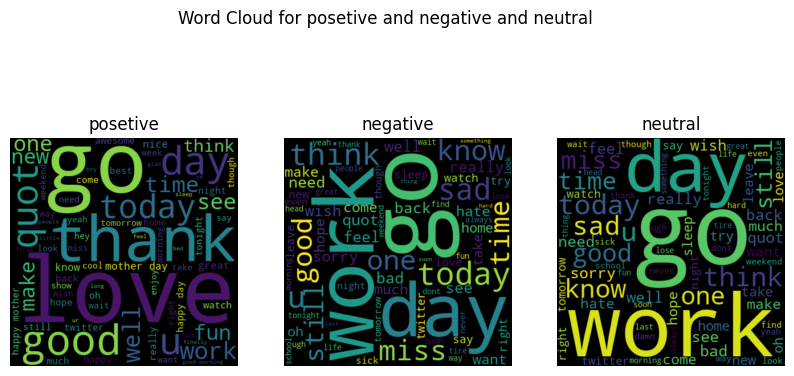

In [53]:
# Word Cloud


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))

posetive_text = ' '.join(cleandf[cleandf['label_num']==1]['clean_content'])
wordcloud_posetive = WordCloud(max_words=73, width=400, height=400).generate(posetive_text)

negative_text = ' '.join(cleandf[cleandf['label_num']==0]['clean_content'])
wordcloud_negative = WordCloud(max_words=73, width=400, height=400).generate(negative_text)

neutral_text = ' '.join(cleandf[cleandf['label_num']==0]['clean_content'])
wordcloud_neutral = WordCloud(max_words=73, width=400, height=400).generate(neutral_text)

ax1.imshow(wordcloud_posetive, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('posetive')

ax2.imshow(wordcloud_negative, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('negative')

ax3.imshow(wordcloud_neutral, interpolation='bilinear')
ax3.axis('off')
ax3.set_title('neutral')
plt.suptitle('Word Cloud for posetive and negative and neutral');

## Dropping the unnessecary columns
<p style="text-align: justify;">
The objective of this project is to train a classification model on the comments text and the sentiment label. So other columns ('content', 'clean_content', 'content_length',
       'tokenized_length', 'clean_content_length') are removed from the dataset and it would be ready for nexts steps.
</p>

In [54]:
cleandf.columns

Index(['sentiment', 'author', 'content', 'label_num', 'clean_content',
       'tokenized', 'content_length', 'tokenized_length',
       'clean_content_length'],
      dtype='object')

In [55]:
# Removing unnecessary columns
cleandf.drop(['content', 'clean_content', 'content_length','tokenized_length', 'clean_content_length'],axis = 1, inplace = True)

In [56]:
# Removing unnecessary columns
cleandf.drop(['sentiment', 'author',],axis = 1, inplace = True)

In [57]:
#| include: False
cleandf.head()

,label_num,tokenized
0,0,"[know, bad, habit, part]"
1,0,"[n, bed, headache, call]"
2,0,"[funeral, ceremony, gloomy]"
3,1,[soon]
4,2,"[want, trade, someone, one]"


### Training the Word2vec Model
I utilized Word2Vec technique to convert textual data into numerical vectors for training machine learning models. Word2Vec is a neural network-based approach that represents each word in a text as a high-dimensional vector, capturing semantic and syntactic relationships between words. This method is crucial for natural language processing tasks like text classification. I configured the Word2Vec model with the following hyperparameters:

- **Vector Size (vector_size)**: The dimensionality of the embedding vector for each word, which determines the number of dimensions in the continuous vector space used to represent words.
  
- **Window Size (window)**: The maximum distance between the current word and the predicted word within a sentence, influencing the scope of context words considered during prediction.

- **Minimum Word Count (min_count)**: The threshold count of a word required for it to be included in the vocabulary. Words occurring less frequently than min_count are ignored during model training to filter out noise.

- **Algorithm (sg)**: This parameter specifies the Word2Vec algorithm used, where "skip-gram" (sg=1) predicts context words given a target word, and "continuous bag of words (CBOW)" predicts the target word given the context words.

Following the model configuration, I trained it using the entire text dataset and transformed the comments dataset into numeric vectors.

In [58]:
# code-fold: true
# Train the Word2Vec Model

vector_size = 100 
window = 4 
min_count = 10 
sg = 1
text_processed = pd.Series(cleandf['tokenized']).values

w2v_model = Word2Vec(text_processed, vector_size= vector_size , min_count = min_count, window = window, sg = sg)

After training the Word2Vec model on all the comments, I proceeded to transform the dataset into numerical vectors. Initially, I divided the dataset into training and testing sets, reserving 20% of the data for testing purposes. Subsequently, for both the training and testing sets, I created separate files to store the word vectors.

Next, I computed the average word vector for each tokenized text. In each iteration, equivalent to the number of rows in the dataset, I filtered out any tokens not present in the vocabulary of the pre-trained Word2Vec model (w2v_model) using list comprehension. Then, I calculated the mean of the word vectors for the remaining tokens along the rows, resulting in a single vector of length 100. This resulting NumPy array was converted to a list. In cases where the result was not a list, indicating no tokens in the row matched the Word2Vec model's vocabulary, a line of zeros was written to the file instead.

Subsequently, I added the header row to the CSV file. The header row contained numbers ranging from 0 to 99, corresponding to the indices of elements in each word vector.

In [59]:
training, testing = train_test_split(cleandf, test_size=0.2, random_state = 15)
print('Train Dataset shape: ',training.shape)
print('Test Dataset shape: ',testing.shape)

Train Dataset shape:  (31861, 2)
Test Dataset shape:  (7966, 2)


In [60]:
word2vec_test = r'word2vec_test.csv'

with open(word2vec_test, 'w+') as word2vec_file:
    for index, row in testing[['tokenized', 'label_num']].iterrows():
        # Taking average of vectors in a sentence. This will create an average array that captures the sentiment of the sentence
        model_vector = (np.mean([w2v_model.wv[token] for token in row['tokenized'] if token in w2v_model.wv.key_to_index], axis=0)).tolist()
        if word2vec_file.tell() == 0:
            header = "label_num," + ",".join(str(item) for item in range(100))
            word2vec_file.write(header)
            word2vec_file.write("\n")
            
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join([str(row['label_num'])] + [str(vector_element) for vector_element in model_vector])
        else:
            line1 = ",".join([str(row['label_num'])] + [str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')


C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



In [61]:
word2vec_train = r'word2vec_train.csv'

with open(word2vec_train, 'w+') as word2vec_file:
    for index, row in training[['tokenized', 'label_num']].iterrows():
        # Taking average of vectors in a sentence. This will create an average array that captures the sentiment of the sentence
        model_vector = (np.mean([w2v_model.wv[token] for token in row['tokenized'] if token in w2v_model.wv.key_to_index], axis=0)).tolist()
        if word2vec_file.tell() == 0:
            header = "label_num," + ",".join(str(item) for item in range(100))
            word2vec_file.write(header)
            word2vec_file.write("\n")
            
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join([str(row['label_num'])] + [str(vector_element) for vector_element in model_vector])
        else:
            line1 = ",".join([str(row['label_num'])] + [str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



In general, each line in this CSV file contains the sentence class label and then the numeric vector corresponding to that sentence.

In [62]:
word2vectest= pd.read_csv('word2vec_test.csv')
word2vectrain = pd.read_csv('word2vec_train.csv')
word2vectrain.head()

,label_num,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,-0.044937,0.084955,-0.026313,-0.012374,0.017773,-0.247082,-0.043022,0.414152,-0.168104,...,0.163957,0.044453,-0.062165,0.003001,0.236342,0.114900,0.033130,-0.169532,0.047062,-0.069556
1,2,-0.019493,0.043809,-0.327925,-0.117586,0.201473,-0.269427,-0.121567,0.650061,-0.130141,...,0.118516,0.315030,0.151903,-0.051456,0.234710,0.120765,-0.118952,-0.134190,0.170187,-0.264691
2,0,0.065516,0.139563,-0.072931,0.180659,-0.110970,-0.331901,0.257717,0.284429,-0.272371,...,0.365135,0.166467,-0.183373,-0.047017,0.423019,0.036678,-0.032834,-0.222177,0.169959,0.097233
3,1,-0.041268,0.049705,0.013300,-0.021870,-0.016283,-0.260949,-0.028070,0.343669,-0.158223,...,0.147716,0.078092,-0.111962,-0.007593,0.206392,0.113137,-0.018083,-0.193605,0.044116,-0.059067
4,1,-0.025596,0.061945,-0.162854,-0.070937,0.041979,-0.274175,-0.072541,0.510699,-0.099315,...,0.289460,0.105763,0.071422,0.068004,0.286104,0.183090,0.072172,-0.149084,0.046972,-0.130311


In [63]:
word2vectest= pd.read_csv('word2vec_test.csv')
word2vectest.head()

,label_num,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1,-0.012972,0.045507,-0.143181,-0.004083,0.023248,-0.240824,-0.009820,0.404257,-0.199855,...,0.244771,0.048931,-0.031122,0.091351,0.271543,0.186081,0.008141,-0.179175,0.069253,-0.014701
1,1,-0.253301,-0.143929,0.029894,0.200798,-0.114317,-0.437478,-0.130571,0.393769,-0.076973,...,0.299671,0.374668,-0.037746,0.190031,0.114336,0.170972,0.157641,-0.279916,0.051718,-0.105966
2,2,0.030080,0.098437,0.046356,-0.014123,0.067651,-0.246343,-0.031931,0.369123,-0.166014,...,0.159066,0.021700,-0.084965,0.006741,0.224266,0.155698,0.006164,-0.175523,0.032711,-0.009308
3,0,-0.014718,0.106900,0.059657,-0.002311,0.052736,-0.247671,-0.062669,0.405076,-0.157858,...,0.181785,0.029324,-0.122430,0.006228,0.228724,0.140920,0.042729,-0.187349,0.028529,-0.039772
4,1,0.036882,0.138428,-0.055992,-0.101299,0.097715,-0.255150,-0.017321,0.502747,-0.177074,...,0.278487,-0.019562,-0.033348,-0.061106,0.290751,0.126139,-0.036960,-0.093250,-0.011329,-0.133039



# Training the Classification Model
<p style = "text-align: justify;">
In previous steps, the text dataset was cleaned and transformed into numerical vectors and now it can be used as the input of the classification algorithms. The <b>َlabel_num</b> column is the label. In this part of the project, different classification algorithms such as <b>Logidtics Regression, Linear Discriminant Analysis (LDA), Decision Tree, K-Nearest Neighbor, Random Forest Classifier</b> and <b> GaussianNB</b> were trained on the training dataset and their performance were evaluated on the testing dataset. 
</p>

<p style="text-align: justify;">
In addition, LSTM model was used for classification. LSTM stands for Long Short-Term Memory, and it is a type of artificial neural network architecture that is commonly used in natural language processing (NLP), speech recognition, and other sequence modeling tasks. I used the Keras library to define my LSTM model. The model has an LSTM layer with 100 neurons, followed by a dense output layer with three neurons (one for each class). As the input vectors have shape (100,) (i.e., 100 features), I reshaped them to have shape (100, 1) to match the input shape of the LSTM layer. The labels are multi (0 or 1 and 2). I trained the model on the training data and used the testing data as validation set during training. After training, I evaluated the model on the test dataset.
</p>

<p style="text-align: justify;">
The table provides classification performance metrics for various models: LSTM, Logistic Regression (LR), Linear Discriminant Analysis (LDA), K-Nearest Neighbors (KNN), Decision Tree Classifier (DTC), Random Forest Classifier (RFC), and Naive Bayes (NB).

- **Accuracy**: Overall correctness of the model's predictions.
- **Precision**: Proportion of correctly predicted positive cases out of all cases predicted as positive.
- **Recall**: Proportion of correctly predicted positive cases out of all actual positive cases.
- **F1 Score**: Harmonic mean of precision and recall, indicating balance between precision and recall.
- **ROC AUC**: Area under the Receiver Operating Characteristic curve, measuring the model's ability to distinguish between positive and negative classes.

LDA achieved the highest accuracy, precision, and F1 score among the models, indicating better overall performance. However, with most models scoring at or below 0.52 accuracy, the classifiers' performance on this dataset is generally poor. Several factors, including the complexity and diversity of the comments texts and limitations of the chosen classification algorithms, may have contributed to the subpar results.
</p>

| Model    | LSTM | LR   | LDA  | KNN  | DTC  | RFC  | NB   |
| -------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Accuracy | 0.48 | 0.51 | 0.52 | 0.47 | 0.42 | 0.51 | 0.46 |
| Precision| ---- | 0.50 | 0.51 | 0.45 | 0.42 | 0.49 | 0.46 |
| Recall   | 0.48 | 0.47 | 0.48 | 0.44 | 0.42 | 0.49 | 0.43 |
| F1 Score | 0.48 | 0.46 | 0.47 | 0.43 | 0.42 | 0.49 | 0.42 |
| ROC AUC  | 0.64 | 0.67 | 0.67 | 0.62 | 0.56 | 0.68 | 0.62 |


this section is too time consuming and it is done about 1 hour.

In [64]:

# Load the data into NumPy arrays
X_train = np.array(word2vectrain.drop('label_num', axis=1))
y_train = np.array(word2vectrain['label_num'])
X_test = np.array(word2vectest.drop('label_num', axis=1))
y_test = np.array(word2vectest['label_num'])

# Define the input shape
input_shape = (X_train.shape[1], 1)

# Define the LSTM model
inputs = Input(shape=input_shape)
lstm = LSTM(128)(inputs)
outputs = Dense(3, activation='softmax')(lstm)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.reshape((-1, *input_shape)), y_train, batch_size=32, epochs=10, validation_data=(X_test.reshape((-1, *input_shape)), y_test))

# Evaluate the model
y_pred = model.predict(X_test.reshape((-1, *input_shape)))

# Calculate evaluation metrics
confusion = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
acc = accuracy_score(y_test, np.argmax(y_pred, axis=1))
f1 = f1_score(y_test, np.argmax(y_pred, axis=1), average='weighted')  # Specify average for multiclass problems
recall = recall_score(y_test, np.argmax(y_pred, axis=1), average='weighted')  # Specify average for multiclass problems
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')  # Specify multi_class for multiclass problems

# Print classification metrics
print('Confusion Matrix:\n', confusion)
print('Accuracy: ', acc)
print('F1 Score: ', f1)
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)


Epoch 1/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 216s 214ms/step - accuracy: 0.4218 - loss: 1.0751 - val_accuracy: 0.4360 - val_loss: 1.0624
Epoch 2/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 236s 237ms/step - accuracy: 0.4486 - loss: 1.0566 - val_accuracy: 0.4577 - val_loss: 1.0489
Epoch 3/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 216s 216ms/step - accuracy: 0.4516 - loss: 1.0556 - val_accuracy: 0.4597 - val_loss: 1.0574
Epoch 4/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 269s 270ms/step - accuracy: 0.4593 - loss: 1.0499 - val_accuracy: 0.4574 - val_loss: 1.0486
Epoch 5/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 228s 229ms/step - accuracy: 0.4651 - loss: 1.0464 - val_accuracy: 0.4485 - val_loss: 1.0618
Epoch 6/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 241s 242ms/step - accuracy: 0.4660 - loss: 1.0478 - val_accuracy: 0.4708 - val_loss: 1.0383
Epoch 7/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 257s 258ms/step - accuracy: 0.4686 - loss: 1.0363 - val_accuracy: 0.4725 - val_loss: 1.0333
Epoch 8/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 240s 241ms/step - accuracy: 0.4792 -

In [65]:
#print(X_train)

In [66]:
models = []
models.append(('LR', LogisticRegression(n_jobs=-1, C=10)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_features= 'auto', max_depth= 12, criterion= 'entropy',
                                            bootstrap= True, class_weight='balanced')))
models.append(('NB', GaussianNB()))


In [67]:
print('Classification Algorithms on Data')
print()

xtrain = word2vectrain.iloc[:,1:]
xtest = word2vectest.iloc[:,1:]
ytrain = word2vectrain['label_num']
ytest = word2vectest['label_num']

for name, model in models:
    if isinstance(model, RandomForestClassifier):
        model.set_params(max_features='sqrt')  # Adjust the max_features parameter
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    accuracy = accuracy_score(ytest, ypred) 
    precision = precision_score(ytest, ypred, average='macro')
    recall = recall_score(ytest, ypred, average='macro')
    f1 = f1_score(ytest, ypred, average='macro')
    
    # Calculate ROC AUC score
    if len(np.unique(ytest)) > 2:
        y_prob = model.predict_proba(xtest)  # Use predict_proba to get probability estimates
        roc_auc = roc_auc_score(ytest, y_prob, average='macro', multi_class='ovo')
    else:
        roc_auc = roc_auc_score(ytest, ypred, average='macro', multi_class='ovr')
    
    print('Classifier:', name)
    print('Accuracy: %.2f' % accuracy)
    print('Precision: %.2f' % precision)
    print('Recall: %.2f' % recall)
    print('F1 Score: %.2f' % f1)
    print('ROC AUC:%.2f' % roc_auc)
    print()


Classification Algorithms on Data

Classifier: LR
Accuracy: 0.51
Precision: 0.49
Recall: 0.47
F1 Score: 0.46
ROC AUC:0.67

Classifier: LDA
Accuracy: 0.51
Precision: 0.49
Recall: 0.47
F1 Score: 0.46
ROC AUC:0.67

Classifier: KNN
Accuracy: 0.47
Precision: 0.45
Recall: 0.44
F1 Score: 0.43
ROC AUC:0.61

Classifier: DTC
Accuracy: 0.42
Precision: 0.41
Recall: 0.41
F1 Score: 0.41
ROC AUC:0.55

Classifier: RF
Accuracy: 0.51
Precision: 0.50
Recall: 0.49
F1 Score: 0.50
ROC AUC:0.68

Classifier: NB
Accuracy: 0.46
Precision: 0.47
Recall: 0.43
F1 Score: 0.42
ROC AUC:0.61



In [68]:
#print(xtrain)

# chatGPT generated texts
<p style="text-align: justify;">
In the second part of the project, I want to evaluate if the texts generated by ChatGPT can be classified based on emotions and answer the question if the use of artificial intelligence makes us have a better answer in the obtained model. Therefore, the first step of this part was the production of texts considering the emotion tag.
</p>

### Creating the dataset
<p style="text-align: justify;">
I asked ChatGPT to generate 200 sentences based on the sentiments I have, which were derived from the 13 types mentioned earlier. I requested the sentences to be balanced equally across all sentiments. Then, I saved the generated data in an Excel file. While I could have used the API command to accomplish this task and leverage the engine provided by ChatGPT, it required payment. Hence, I opted to manually request this task from ChatGPT.
<p style="text-align: justify;">
After reading the chatGPT dataset, I cleaned texts using the same methods which were used for cleaning the tweet dataset. Then I removed the unnecessary columns and plotted the word cloud for each label. 
</p>

In [69]:
#| include: False
chatGPT = pd.read_excel('data/chatGPT.xlsx')
chatGPT.head()

,sentiment,comment
0,sadness,"Feeling blue today, everything seems gloomy."
1,happiness,"Grinning from ear to ear, life is beautiful!"
2,worry,"Anxiety kicking in, can't shake off these thou..."
3,neutral,"Feeling neither high nor low, just going with ..."
4,love,"Heart bursting with affection, surrounded by w..."


In [70]:
#  grouping 13 labels into 3 classes: 'negative', 'positive', 'neutral'
sentiment_mapping = {
    'empty': 'negative',
    'sadness': 'negative',
    'worry': 'negative',
    'hate': 'negative',
    'boredom': 'negative',
    'anger': 'negative',
    'enthusiasm': 'positive',
    'neutral': 'neutral',
    'surprise': 'neutral',
    'love': 'positive',
    'fun': 'positive',
    'happiness': 'positive',
    'relief': 'positive'
}

# Create a new col for the mapping
chatGPT['label'] = chatGPT['sentiment'].map(sentiment_mapping)

In [71]:
chatGPT.head()

,sentiment,comment,label
0,sadness,"Feeling blue today, everything seems gloomy.",negative
1,happiness,"Grinning from ear to ear, life is beautiful!",positive
2,worry,"Anxiety kicking in, can't shake off these thou...",negative
3,neutral,"Feeling neither high nor low, just going with ...",neutral
4,love,"Heart bursting with affection, surrounded by w...",positive


In [72]:
chatGPT['clean_content']=chatGPT['comment'].apply(text_cleaner)

In [73]:
chatGPT.head()

,sentiment,comment,label,clean_content
0,sadness,"Feeling blue today, everything seems gloomy.",negative,feel blue today everything gloomy
1,happiness,"Grinning from ear to ear, life is beautiful!",positive,grin ear ear life beautiful
2,worry,"Anxiety kicking in, can't shake off these thou...",negative,anxiety kick shake
3,neutral,"Feeling neither high nor low, just going with ...",neutral,feel neither high low go flow
4,love,"Heart bursting with affection, surrounded by w...",positive,heart affection surround warmth


In [74]:
print('The number of NaN-values in the pre-processed dataset is: ', chatGPT['clean_content'].isnull().sum())

The number of NaN-values in the pre-processed dataset is:  0


In [75]:
# Mapping sentiment num / encode
chatGPT["label_num"] = chatGPT.label.map({
    'negative': 0,
    'positive': 1,
    'neutral': 2
})

chatGPT = chatGPT.drop(columns=['label'])
chatGPT.head(5)

,sentiment,comment,clean_content,label_num
0,sadness,"Feeling blue today, everything seems gloomy.",feel blue today everything gloomy,0
1,happiness,"Grinning from ear to ear, life is beautiful!",grin ear ear life beautiful,1
2,worry,"Anxiety kicking in, can't shake off these thou...",anxiety kick shake,0
3,neutral,"Feeling neither high nor low, just going with ...",feel neither high low go flow,2
4,love,"Heart bursting with affection, surrounded by w...",heart affection surround warmth,1


in the excel file was generated by chat gpt for ChatGPT dataset I try to have a equal data for each sentiment and the whole of the data set is the similar shape with the original data set in tweet comments.

in the excel was generated by chatGPT I try to have an equal rows for each sentiment and the whole data was same the original data in tweet comments

In [76]:
import plotly.express as px
fig = px.histogram(chatGPT, x="label_num", color="sentiment", title="<b>Relationship between label num and clean content in the chatGPT excel file </b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

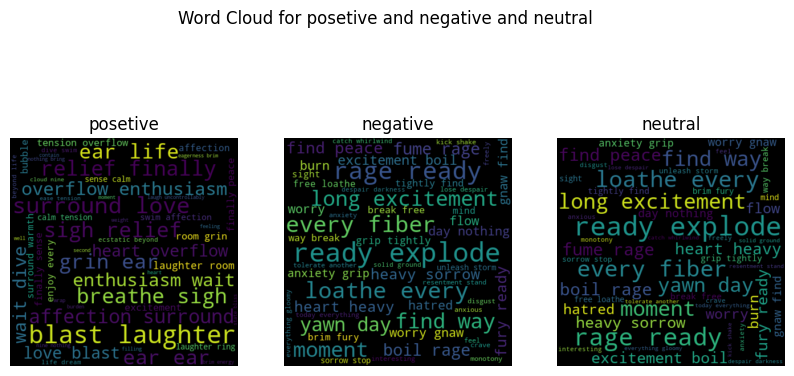

In [77]:
# Word Cloud

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))

posetive_text = ' '.join(chatGPT[chatGPT['label_num']==1]['clean_content'])
wordcloud_posetive = WordCloud(max_words=50, width=400, height=400).generate(posetive_text)

negative_text = ' '.join(chatGPT[chatGPT['label_num']==0]['clean_content'])
wordcloud_negative = WordCloud(max_words=50, width=400, height=400).generate(negative_text)

neutral_text = ' '.join(chatGPT[chatGPT['label_num']==0]['clean_content'])
wordcloud_neutral = WordCloud(max_words=50, width=400, height=400).generate(neutral_text)

ax1.imshow(wordcloud_posetive, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('posetive')

ax2.imshow(wordcloud_negative, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('negative')

ax3.imshow(wordcloud_neutral, interpolation='bilinear')
ax3.axis('off')
ax3.set_title('neutral')
plt.suptitle('Word Cloud for posetive and negative and neutral');

### Classification Algorithm on chatGPT dataset
<p style="text-align: justify;">
In the following, the label_num column was transformed into 0 , 1 and 2  then used the word2vec model which was trained on the tweet comment dataset to convert the chatGPT texts into numerical vectors. Finally the classification models were evaluated on the chatGPT texts. In the evaluation part, firstly I tested the same classification models trained on the dataset on the chatGPT data. Then, I devided the chatGPT texts into train and test dataset and fitted the classification models on training data and evaluated their prediction on the training dataset. 
</p>
The classification metris for the both approaches are presented in the following tables.

Classifiers on chatGPT dataset, trained by tweet comment Dataset:

| Model    | LSTM | LR   | LDA  | KNN  | DTC  | RFC  | NB   |
| -------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Accuracy | 0.49 | 0.36 | 0.38 | 0.43 | 0.40 | 0.38 | 0.31 |
| Precision| 0.15 | 0.38 | 0.47 | 0.36 | 0.40 | 0.38 | 0.31 |
| Recall   | 0.31 | 0.31 | 0.39 | 0.35 | 0.41 | 0.37 | 0.23  |
| F1 Score | 0.20 | 0.30 | 0.41 | 0.35 | 0.38 | 0.26 | 0.25 |
| ROC AUC  | 0.66 | 0.67 | 0.67 | 0.62 | 0.55 | 0.64 | 0.62 |


Classifiers on chatGPT dataset, trained by chatGPT Dataset:

| Model    | LSTM | LR   | LDA  | KNN  | DTC  | RFC  | NB   |
| -------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Accuracy | 0.37 | 0.51 | 0.51 | 0.46 | 0.42 | 0.51 | 0.46 |
| Precision| 0.15 | 0.49 | 0.49 | 0.45 | 0.41 | 0.50 | 0.46 |
| Recall   | 0.20 | 0.47 | 0.47 | 0.44 | 0.41 | 0.50 | 0.43 |
| F1 Score | 0.37 | 0.45 | 0.46 | 0.43 | 0.41 | 0.50 | 0.42 |
| ROC AUC  | 0.61 | 0.67 | 0.67 | 0.62 | 0.55 | 0.68 | 0.62 |


<p style="text-align: justify;">
The accuracy scores for all classifiers were around 40%, which means that they were not much better than random guessing. The precision scores were also low for most classifiers, indicating that the models were not very good at correctly predicting the sentiments.
</p>

<p style="text-align: justify;">
The recall scores were particularly low for the classifiers trained on the chatGPT dataset, while they were higher for the classifiers trained on the tweet comments dataset. 
</p>

<p style="text-align: justify;">
The ROC AUC scores were around 0.5, which is the same as random guessing, except for Naive Bayes algorithm trained on chatGPT dataset, which was 62%.
</p>

<p style="text-align: justify;">
Overall, the low classification metrics indicate that the models were not very effective in identifying the sentiment based on the generated texts by chatgpt .
</p>

In [78]:
tokenized_text = []
for i in chatGPT['clean_content']:
    x =  word_tokenize(i)
    tokenized_text.append(x)
chatGPT['tokenized'] = tokenized_text

In [79]:
chatGPT.head()

,sentiment,comment,clean_content,label_num,tokenized
0,sadness,"Feeling blue today, everything seems gloomy.",feel blue today everything gloomy,0,"[feel, blue, today, everything, gloomy]"
1,happiness,"Grinning from ear to ear, life is beautiful!",grin ear ear life beautiful,1,"[grin, ear, ear, life, beautiful]"
2,worry,"Anxiety kicking in, can't shake off these thou...",anxiety kick shake,0,"[anxiety, kick, shake]"
3,neutral,"Feeling neither high nor low, just going with ...",feel neither high low go flow,2,"[feel, neither, high, low, go, flow]"
4,love,"Heart bursting with affection, surrounded by w...",heart affection surround warmth,1,"[heart, affection, surround, warmth]"


In [80]:
le = LabelEncoder()
chatGPT['label_num'] = le.fit_transform(chatGPT['label_num'])
chatGPT.head()

,sentiment,comment,clean_content,label_num,tokenized
0,sadness,"Feeling blue today, everything seems gloomy.",feel blue today everything gloomy,0,"[feel, blue, today, everything, gloomy]"
1,happiness,"Grinning from ear to ear, life is beautiful!",grin ear ear life beautiful,1,"[grin, ear, ear, life, beautiful]"
2,worry,"Anxiety kicking in, can't shake off these thou...",anxiety kick shake,0,"[anxiety, kick, shake]"
3,neutral,"Feeling neither high nor low, just going with ...",feel neither high low go flow,2,"[feel, neither, high, low, go, flow]"
4,love,"Heart bursting with affection, surrounded by w...",heart affection surround warmth,1,"[heart, affection, surround, warmth]"


In [81]:
chatGPT.drop(['comment','clean_content','sentiment'],axis = 1, inplace = True)

In [82]:
chatGPT.head()

,label_num,tokenized
0,0,"[feel, blue, today, everything, gloomy]"
1,1,"[grin, ear, ear, life, beautiful]"
2,0,"[anxiety, kick, shake]"
3,2,"[feel, neither, high, low, go, flow]"
4,1,"[heart, affection, surround, warmth]"


In [83]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Assuming chatGPT and w2v_model are predefined and loaded

# Transforming the text into numerical vectors using Word2Vec
gptword2vec = pd.DataFrame(columns=['label_num'] + [f'vec{i}' for i in range(100)])

# Iterate over the rows of the original DataFrame
for index, row in chatGPT.iterrows():
    tokens = [token for token in row['tokenized'] if token in w2v_model.wv.key_to_index]
    if tokens:
        model_vector = np.mean([w2v_model.wv[token] for token in tokens], axis=0).tolist()
        new_row = [row['label_num']] + model_vector
    else:
        new_row = [row['label_num']] + [0] * 100
        
    gptword2vec.loc[index] = new_row

# Prepare data for LSTM model
X_gptword2vec = np.array(gptword2vec.drop('label_num', axis=1))
y_gptword2vec = np.array(gptword2vec['label_num'])

# Reshape input data to 3D shape expected by LSTM
X_gptword2vec = X_gptword2vec.reshape((-1, 100, 1))

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_gptword2vec))
y_gptword2vec_onehot = to_categorical(y_gptword2vec, num_classes=num_classes)

# Define the LSTM model
lstm = Sequential()
lstm.add(LSTM(128, input_shape=(100, 1), return_sequences=False))
lstm.add(Dense(num_classes, activation='softmax'))

# Compile the model
lstm.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm.fit(X_gptword2vec, y_gptword2vec_onehot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = lstm.predict(X_gptword2vec)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate classification metrics
confusion = confusion_matrix(y_gptword2vec, y_pred_classes)
precision = precision_score(y_gptword2vec, y_pred_classes, average='weighted')
f1 = f1_score(y_gptword2vec, y_pred_classes, average='weighted')
recall = recall_score(y_gptword2vec, y_pred_classes, average='weighted')

# Calculate ROC AUC score
if num_classes > 2:
    roc_auc = roc_auc_score(y_gptword2vec, y_pred, average='macro', multi_class='ovo')
else:
    roc_auc = roc_auc_score(y_gptword2vec, y_pred_classes)

# Print classification metrics
print('Confusion Matrix:\n', confusion)
print('Accuracy: ', np.mean(y_gptword2vec == y_pred_classes))
print('Precision: ', precision)
print('F1 Score: ', f1)
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)


Epoch 1/10


C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 288ms/step - accuracy: 0.4703 - loss: 1.0916 - val_accuracy: 0.4464 - val_loss: 1.0651
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.3760 - loss: 1.0544 - val_accuracy: 0.5000 - val_loss: 1.0396
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.4616 - loss: 1.0419 - val_accuracy: 0.4464 - val_loss: 1.0446
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4079 - loss: 1.0435 - val_accuracy: 0.4464 - val_loss: 1.0367
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.4370 - loss: 1.0451 - val_accuracy: 0.4464 - val_loss: 1.0364
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.4420 - loss: 1.0434 - val_accuracy: 0.5000 - val_loss: 1.0374
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.4269 - loss: 1.0424 - val_accuracy: 0.4286 - val_loss: 1.0392
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.4180 - loss: 1.0128 - val_accuracy: 0.5179 - val_loss: 1.0377
Epo

C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [84]:
models = []
models.append(('LR', LogisticRegression(n_jobs=-1, C=10)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 12, criterion= 'entropy',
                                            bootstrap= True, class_weight='balanced')))
models.append(('NB', GaussianNB()))



In [85]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Assuming chatGPT and w2v_model are predefined and loaded

# Transforming the text into numerical vectors using Word2Vec
gptword2vec = pd.DataFrame(columns=['label_num'] + [f'vec{i}' for i in range(100)])

# Iterate over the rows of the original DataFrame
for index, row in chatGPT.iterrows():
    tokens = [token for token in row['tokenized'] if token in w2v_model.wv.key_to_index]
    if tokens:
        model_vector = np.mean([w2v_model.wv[token] for token in tokens], axis=0).tolist()
        new_row = [row['label_num']] + model_vector
    else:
        new_row = [row['label_num']] + [0] * 100
        
    gptword2vec.loc[index] = new_row

# Prepare data for LSTM model
X_gptword2vec = np.array(gptword2vec.drop('label_num', axis=1))
y_gptword2vec = np.array(gptword2vec['label_num'])

# Reshape input data to 3D shape expected by LSTM
X_gptword2vec_3d = X_gptword2vec.reshape((-1, 100, 1))

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_gptword2vec))
y_gptword2vec_onehot = to_categorical(y_gptword2vec, num_classes=num_classes)

# Define the LSTM model
lstm = Sequential()
lstm.add(LSTM(128, input_shape=(100, 1), return_sequences=False))
lstm.add(Dense(num_classes, activation='softmax'))

# Compile the model
lstm.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm.fit(X_gptword2vec_3d, y_gptword2vec_onehot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the LSTM model
y_pred_lstm = lstm.predict(X_gptword2vec_3d)
y_pred_classes_lstm = np.argmax(y_pred_lstm, axis=1)

# Calculate classification metrics for LSTM
confusion_lstm = confusion_matrix(y_gptword2vec, y_pred_classes_lstm)
precision_lstm = precision_score(y_gptword2vec, y_pred_classes_lstm, average='weighted')
f1_lstm = f1_score(y_gptword2vec, y_pred_classes_lstm, average='weighted')
recall_lstm = recall_score(y_gptword2vec, y_pred_classes_lstm, average='weighted')
roc_auc_lstm = roc_auc_score(y_gptword2vec, y_pred_lstm, average='macro', multi_class='ovo')

# Print classification metrics for LSTM
print('LSTM Classifier')
print('Confusion Matrix:\n', confusion_lstm)
print('Accuracy: %.2f' % accuracy_score(y_gptword2vec, y_pred_classes_lstm))
print('Precision: %.2f' % precision_lstm)
print('Recall: %.2f' % recall_lstm)
print('F1 Score: %.2f' % f1_lstm)
print('ROC AUC: %.2f' % roc_auc_lstm)
print()


# Use 2D input for traditional models
X_gptword2vec_2d = X_gptword2vec

for name, model in models:
    model.fit(xtrain, ytrain)
    gptypred = model.predict(X_gptword2vec_2d)

    accuracy = accuracy_score(y_gptword2vec, gptypred) 
    precision = precision_score(y_gptword2vec, gptypred, average='macro')
    recall = recall_score(y_gptword2vec, gptypred, average='macro') 
    f1 = f1_score(y_gptword2vec, gptypred, average='macro') 
    # Calculate ROC AUC score
    if len(np.unique(ytest)) > 2:
        y_prob = model.predict_proba(xtest)  # Use predict_proba to get probability estimates
        roc_auc = roc_auc_score(ytest, y_prob, average='macro', multi_class='ovo')
    else:
        roc_auc = roc_auc_score(ytest, ypred, average='macro', multi_class='ovr')
         
    print('Classifier:', name)
    print('Accuracy: %.2f' % accuracy)
    print('Precision: %.2f' % precision)
    print('Recall: %.2f' % recall)
    print('F1 Score: %.2f' % f1)
    print('ROC AUC: %.2f' % roc_auc)
    print()


Epoch 1/10


C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - accuracy: 0.3806 - loss: 1.0937 - val_accuracy: 0.4464 - val_loss: 1.0732
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.4295 - loss: 1.0592 - val_accuracy: 0.4464 - val_loss: 1.0424
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.4341 - loss: 1.0301 - val_accuracy: 0.5714 - val_loss: 1.0415
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.5037 - loss: 1.0202 - val_accuracy: 0.4286 - val_loss: 1.0415
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.4176 - loss: 1.0782 - val_accuracy: 0.6071 - val_loss: 1.0393
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4591 - loss: 1.0256 - val_accuracy: 0.4464 - val_loss: 1.0377
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.4454 - loss: 1.0197 - val_accuracy: 0.4464 - val_loss: 1.0371
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4005 - loss: 1.0412 - val_accuracy: 0.5714 - val_loss: 1.0396
Epo

C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



Classifier: LR
Accuracy: 0.34
Precision: 0.23
Recall: 0.28
F1 Score: 0.25
ROC AUC: 0.67



C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names

C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



Classifier: LDA
Accuracy: 0.38
Precision: 0.45
Recall: 0.31
F1 Score: 0.31
ROC AUC: 0.67

Classifier: KNN
Accuracy: 0.42
Precision: 0.37
Recall: 0.36
F1 Score: 0.36
ROC AUC: 0.61



C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



Classifier: DTC
Accuracy: 0.37
Precision: 0.37
Recall: 0.36
F1 Score: 0.35
ROC AUC: 0.55



C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Classifier: RF
Accuracy: 0.39
Precision: 0.38
Recall: 0.39
F1 Score: 0.38
ROC AUC: 0.68

Classifier: NB
Accuracy: 0.30
Precision: 0.23
Recall: 0.25
F1 Score: 0.22
ROC AUC: 0.61



C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [86]:
# Splitting chatSPT texts into test and train datasets

chatGPTtrain, chatGPTtest = train_test_split(chatGPT, test_size=0.2, random_state = 18)

chatGPTxtrain = chatGPTtrain['tokenized'].reset_index()
chatGPTytrain = chatGPTtrain['label_num']
chatGPTxtest = chatGPTtest['tokenized'].reset_index()
chatGPTytest = chatGPTtest['label_num']
print('xtrain shape: ',chatGPTxtrain.shape)
print('ytrain shape: ',chatGPTytrain.shape)
print('xtest shape: ',chatGPTxtest.shape)
print('ytest shape: ',chatGPTytest.shape)

xtrain shape:  (224, 2)
ytrain shape:  (224,)
xtest shape:  (56, 2)
ytest shape:  (56,)


In [87]:
# Transforming the train dataset of chatGPT texts into numerical vectors using word2vec models traind on Data

gptword2vectrain = pd.DataFrame(columns=['label_num'] + [f'vec{i}' for i in range(100)])

for index, row in chatGPTtrain.iterrows():
    model_vector = (np.mean([w2v_model.wv[token] for token in row['tokenized'] if token in w2v_model.wv.key_to_index], axis=0)).tolist()
    
    if type(model_vector) is list:  
        new_row = [row['label_num']] + model_vector
    else:
        new_row = [row['label_num']] + [0] * 100
        
    gptword2vectrain.loc[index] = new_row

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



In [88]:
# Transforming the test dataset of chatGPT texts into numerical vectors using word2vec models traind on the Data

gptword2vectest = pd.DataFrame(columns=['label_num'] + [f'vec{i}' for i in range(100)])

for index, row in chatGPTtest.iterrows():
    model_vector = (np.mean([w2v_model.wv[token] for token in row['tokenized'] if token in w2v_model.wv.key_to_index], axis=0)).tolist()
    
    if type(model_vector) is list:  
        new_row = [row['label_num']] + model_vector
    else:
        new_row = [row['label_num']] + [0] * 100
        
    gptword2vectest.loc[index] = new_row
    

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [89]:
#print(gptword2vectest)

In [90]:
# Generate column names ['0', '1', '2', ..., '99']
column_names = [str(i) for i in range(101)]
# Assign column names to X_gptword2vec
gptword2vectest.columns = column_names


In [91]:
#print(gptword2vectest)

In [92]:
# Generate column names ['0', '1', '2', ..., '99']
column_names = [str(i) for i in range(101)]
# Assign column names to X_gptword2vec
gptword2vectrain.columns = column_names


In [93]:
#print(gptword2vectrain)

In [94]:
# LSTM model traind on chatGPT data
X_train = np.array(gptword2vectrain.drop('0', axis=1))
y_train = np.array(gptword2vectrain['0'])
X_test = np.array(gptword2vectest.drop('0', axis=1))
y_test = np.array(gptword2vectest['0'])

In [95]:
# Define the input shape
input_shape = (X_train.shape[1], 1)

# Define the LSTM model
inputs = Input(shape=input_shape)
lstm = LSTM(128)(inputs)
outputs = Dense(3, activation='softmax')(lstm)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.reshape((-1, *input_shape)), y_train, batch_size=32, epochs=10, validation_data=(X_test.reshape((-1, *input_shape)), y_test))

# Evaluate the model
y_pred = model.predict(X_test.reshape((-1, *input_shape)))

# Calculate evaluation metrics
confusion = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
acc = accuracy_score(y_test, np.argmax(y_pred, axis=1))
f1 = f1_score(y_test, np.argmax(y_pred, axis=1), average='weighted')  # Specify average for multiclass problems
recall = recall_score(y_test, np.argmax(y_pred, axis=1), average='weighted')  # Specify average for multiclass problems
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')  # Specify multi_class for multiclass problems

# Print classification metrics
print('Confusion Matrix:\n', confusion)
print('Accuracy: ', acc)
print('F1 Score: ', f1)
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.4461 - loss: 1.0929 - val_accuracy: 0.3750 - val_loss: 1.0639
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.4421 - loss: 1.0741 - val_accuracy: 0.3750 - val_loss: 1.0418
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4343 - loss: 1.0502 - val_accuracy: 0.3750 - val_loss: 1.0502
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4124 - loss: 1.0575 - val_accuracy: 0.3750 - val_loss: 1.0459
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.4277 - loss: 1.0626 - val_accuracy: 0.3750 - val_loss: 1.0387
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4335 - loss: 1.0502 - val_accuracy: 0.3750 - val_loss: 1.0266
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4432 - loss: 1.0552 - val_accuracy: 0.3750 - val_loss: 1.0151
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4360 - loss: 1.0482 - val_accuracy: 0.3750 - val_loss:

In [96]:
models = []
models.append(('LR', LogisticRegression(n_jobs=-1, C=10)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 12, criterion= 'entropy',
                                            bootstrap= True, class_weight='balanced')))
models.append(('NB', GaussianNB()))

In [97]:
print('Classification Algorithms on Data')
print()

gptxtrain = gptword2vectrain.iloc[:,1:]
gptxtest = gptword2vectest.iloc[:,1:]
gptytrain = gptword2vectrain['0']
gptytest = gptword2vectest['0']

for name, model in models:
    if isinstance(model, RandomForestClassifier):
        model.set_params(max_features='sqrt')  # Adjust the max_features parameter
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    accuracy = accuracy_score(ytest, ypred) 
    precision = precision_score(ytest, ypred, average='macro')
    recall = recall_score(ytest, ypred, average='macro')
    f1 = f1_score(ytest, ypred, average='macro')
    
    # Calculate ROC AUC score
    if len(np.unique(ytest)) > 2:
        y_prob = model.predict_proba(xtest)  # Use predict_proba to get probability estimates
        roc_auc = roc_auc_score(ytest, y_prob, average='macro', multi_class='ovo')
    else:
        roc_auc = roc_auc_score(ytest, ypred, average='macro', multi_class='ovr')
    
    print('Classifier:', name)
    print('Accuracy: %.2f' % accuracy)
    print('Precision: %.2f' % precision)
    print('Recall: %.2f' % recall)
    print('F1 Score: %.2f' % f1)
    print('ROC AUC:%.2f' % roc_auc)
    print()


Classification Algorithms on Data

Classifier: LR
Accuracy: 0.51
Precision: 0.49
Recall: 0.47
F1 Score: 0.46
ROC AUC:0.67

Classifier: LDA
Accuracy: 0.51
Precision: 0.49
Recall: 0.47
F1 Score: 0.46
ROC AUC:0.67

Classifier: KNN
Accuracy: 0.47
Precision: 0.45
Recall: 0.44
F1 Score: 0.43
ROC AUC:0.61

Classifier: DTC
Accuracy: 0.42
Precision: 0.42
Recall: 0.42
F1 Score: 0.42
ROC AUC:0.56

Classifier: RF
Accuracy: 0.51
Precision: 0.50
Recall: 0.49
F1 Score: 0.49
ROC AUC:0.68

Classifier: NB
Accuracy: 0.46
Precision: 0.47
Recall: 0.43
F1 Score: 0.42
ROC AUC:0.61



# Kaggle 


**Purpose of this step:**

To compare the performance of three classification algorithms by en

**Algorithms and parameters used:**
   - Multinomial Naive Bayes (MNB), Param: default
   - Multilayer Perceptron (MLP), Param: 100,100, a=0.01
   - Support Vector Machine (SVM), Param: default
  
**Results (accuracy):**

MNB: 0.533

MLP: 0.53

SVM: 0.59

**Best-performing algorithm and why:**

Support Vector Machine.

Reason:
SVM demonstrated the highest Accuracy, Precision and Recall rates. It also exhibited robustness to noise and changes in input data, making it the ideal choice for the this particular dataset. Additionaly, it does not require significant computational resources, making
it an approachable option.


- TF-IDF as Feature Engineering method

Rationale:  TF-IDF exhibited higher accuracy compared to GloVe. Accuracy rates dropped by up to 20% after embedding text using GloVe.



In [98]:
dfcopy.head()

,sentiment,author,content,label_num
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,0
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,0
2,sadness,coolfunky,Funeral ceremony...gloomy friday...,0
3,enthusiasm,czareaquino,wants to hang out with friends SOON!,1
4,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,2


In [99]:
X = dfcopy['content']
y = dfcopy['label_num']

# Making sure that X y have the same length
print(len(X))
print(len(y))

39827
39827


In [100]:
import nltk
print(nltk.data.path)

['C:\\Users\\Nastaran/nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\share\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\lib\\nltk_data', 'C:\\Users\\Nastaran\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [101]:
# Cleaning and lemmatising
cleaned = []

for sen in range(0, len(X)):
    # Remove all the special characters (any letter or a digit)
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters (surrounded by whitespace)
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization- splits into list of words ['The', 'quick', ....]
    document = document.split()

    lemma = WordNetLemmatizer()
    document = [lemma.lemmatize(word) for word in document]
    document = ' '.join(document)
    cleaned.append(document)

In [102]:
# Making sure that cleaned data has the same length as X
len(cleaned)

39827

**Exploring Cleaned Data & Investigating Stopwords in Text**

In [103]:
# Count stopwords present in the data
#nltk.download('punkt')
def count_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    return len(set(words) & stop_words)

# Add a new col 'stop_words' that contains the count of stopwords
dfcopy['stop_words'] = dfcopy['content'].apply(count_stopwords)
value_counts = dfcopy['stop_words'].value_counts()

In [104]:
# Count the number of stopwords in the data
temp = dfcopy.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & stop_words))

# Print rows that contain stopwords
rows_with_stopwords = temp[temp['stop_words'] > 0]
print(rows_with_stopwords)

        sentiment         author  \
0           empty     xoshayzers   
1         sadness      wannamama   
3      enthusiasm    czareaquino   
4         neutral      xkilljoyx   
5           worry  xxxPEACHESxxx   
...           ...            ...   
39819     neutral    _Alectrona_   
39820     neutral     bushidosan   
39823        love       drapeaux   
39824        love       JenniRox   
39826        love    Alpharalpha   

                                                 content  label_num  \
0      @tiffanylue i know  i was listenin to bad habi...          0   
1      Layin n bed with a headache  ughhhh...waitin o...          0   
3                   wants to hang out with friends SOON!          1   
4      @dannycastillo We want to trade with someone w...          2   
5      Re-pinging @ghostridah14: why didn't you go to...          0   
...                                                  ...        ...   
39819  @jasimmo Ooo showing of your French skills!! l...          2   

In [105]:
# Explore tweet that contains stopwords
dfcopy['content'][3]
# dfcopy.loc[3]

'wants to hang out with friends SOON!'

In [106]:
# Count stopwords in index 3
stop_words = set(stopwords.words("english"))
df_indx = dfcopy['content'][3]
stopword_count = len([word for word in df_indx.split() if word in stop_words])
stopword_count

3

In [107]:
# Print all the stopwords in index 3
stopwords_in_content = [word for word in df_indx.split() if word in stop_words]

print("Stopwords in dfcopy['content'][3]:")
print(stopwords_in_content)

'''
The cleaned sentence from 4th row, ['wants to hang out with friends SOON!']
contains 3 stopwords, 'to', 'out', and 'with'
'''

Stopwords in dfcopy['content'][3]:
['to', 'out', 'with']


"\nThe cleaned sentence from 4th row, ['wants to hang out with friends SOON!']\ncontains 3 stopwords, 'to', 'out', and 'with'\n"

## Tokenisation

In [108]:
cleaned_tokenized = []
for each in cleaned:
    doc = sent_tokenize(each)
    for sentence in doc:
        cleaned_tokenized.append(sentence)

# Type and length of the cleaned & tokenised sentence
print(type(cleaned_tokenized))
print(len(cleaned_tokenized))

# Print the fist 15 lines of the cleaned & tokenised sentence
for i in range(15):
  print(cleaned_tokenized[i])

<class 'list'>
39827
tiffanylue know wa listenin to bad habit earlier and started freakin at his part
layin bed with headache ughhhh waitin on your call
funeral ceremony gloomy friday
want to hang out with friend soon
dannycastillo we want to trade with someone who ha houston ticket but no one will
re pinging ghostridah14 why didn you go to prom bc my bf didn like my friend
i should be sleep but im not thinking about an old friend who want but he married now damn amp he want me 2 scandalous
hmmm http www djhero com is down
charviray charlene my love miss you
kelcouch m sorry at least it friday
cant fall asleep
choked on her retainer
ugh have to beat this stupid song to get to the next rude
brodyjenner if watch the hill in london will realise what tourture it is because were week and week late just watch itonlinelol
got the news


In [109]:
# Crate a new colum that contains processed text
dfcopy['processed_content'] = cleaned_tokenized

# Reorder col
desired_order = ['content', 'processed_content', 'label_num']
dfcopy = dfcopy[desired_order]
dfcopy.head(10)

X = cleaned_tokenized

In [110]:
# Pick a random row, count SW in that sentence
dfcopy.loc[3]

content              wants to hang out with friends SOON!
processed_content       want to hang out with friend soon
label_num                                               1
Name: 3, dtype: object

## Vectorising Using TF-
Vectorizing text data using TF-IDF (Term Frequency-Inverse Document Frequency) is a common and effective method in natural language processing (NLP) to convert text into numerical features for machine learning models. 

In [111]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X)
freq_term_matrix = count_vectorizer.transform(X)      # CV sparse matrix

tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix) # tf-idf sparse matrix
# print(tf_idf_matrix)
dense_tf_idf_matrix = tf_idf_matrix.toarray()         # tf-idf dense matrix
# print(dense_tf_idf_matrix)

X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, y, test_size=0.2, random_state=42)

## Evaluation MNB
To evaluate a Multinomial Naive Bayes (MNB) classifier, focus on interpreting the performance metrics produced after training the classifier and making predictions on the test set.

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.49      0.92      0.64     12834
           1       0.63      0.45      0.53     10395
           2       0.53      0.02      0.05      8632

    accuracy                           0.53     31861
   macro avg       0.55      0.47      0.41     31861
weighted avg       0.55      0.53      0.44     31861

Accuracy (Cross-Validation): 0.5254386240231004
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.49      0.91      0.64      3190
           1       0.65      0.49      0.56      2629
           2       0.50      0.03      0.05      2147

    accuracy                           0.53      7966
   macro avg       0.55      0.48      0.42      7966
weighted avg       0.55      0.53      0.46      7966

Accuracy (Test Data): 0.5333919156414763


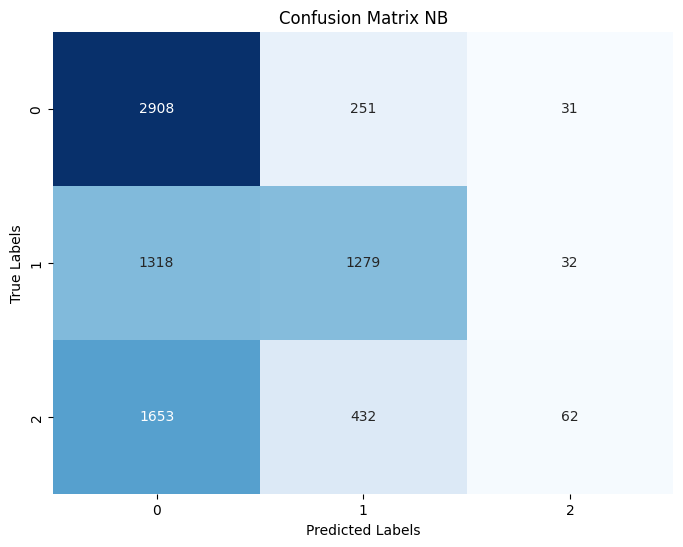

In [112]:
model = MultinomialNB()

# Train
model.fit(X_train, y_train)

# Test
y_pred = model.predict(X_test)

# Evaluate
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)

classification_rep = classification_report(y_train, y_pred_cv)
print("Classification Report (Cross-Validation):\n", classification_rep)

accuracy = accuracy_score(y_train, y_pred_cv)
print("Accuracy (Cross-Validation):", accuracy)

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

classification_rep_test = classification_report(y_test, y_pred_test)
print("Classification Report (Test Data):\n", classification_rep_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy (Test Data):", accuracy_test)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix NB')
plt.show()

Interpretation
Class 0:

High recall (0.91-0.92) but moderate precision (0.49). This indicates the model is good at identifying most instances of Class 0, but also has a high number of false positives, leading to lower precision.
Class 1:

Moderate precision (0.63-0.65) and recall (0.45-0.49). This shows the model has a balanced but moderate performance for this class.
Class 2:

Precision around 0.50 but very low recall (0.02-0.03). This indicates the model is poor at identifying Class 2, missing most instances (high false negatives).
Overall Accuracy:

Both cross-validation (52.54%) and test data (53.34%) accuracy are similar, indicating consistency but not high performance.
Macro and Weighted Averages:

The macro averages (precision, recall, F1-score) indicate the model's overall balanced performance is low, especially in recall and F1-score, reflecting the poor performance on Class 2.
Weighted averages are slightly better than macro averages because they account for the support of each class, showing that performance is somewhat skewed by the larger number of instances in Class 0 and Class 1.
Conclusion
The model shows reasonable performance for Class 0 and Class 1, but struggles significantly with Class 2. This is reflected in the low recall and F1-score for Class 2. The accuracy (~53%) suggests the model is slightly better than random guessing (assuming a balanced dataset).

## Evaluation MLP

In [113]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), alpha = 0.01, max_iter=100)

# Train
history = mlp_model.fit(X_train, y_train)

# Test
y_pred = mlp_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")



C:\Users\Nastaran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning:

Training interrupted by user.



Accuracy: 0.5289
Precision: 0.5233
Recall: 0.5289
F1-score: 0.5247


Training interrupted by user.

Accuracy: 0.5289

Precision: 0.5233

Recall: 0.5289

F1-score: 0.5247


## Evaluation SVM

In [114]:
# Train
model = SVC()
model.fit(X_train, y_train)

# Test
y_pred = model.predict(X_test)

# Evaluate
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67      3190
           1       0.65      0.59      0.62      2629
           2       0.48      0.35      0.41      2147

    accuracy                           0.59      7966
   macro avg       0.58      0.56      0.56      7966
weighted avg       0.58      0.59      0.58      7966

Accuracy: 0.5906351995982927


 Here's a breakdown of what each metric and value means:

Class-Level Metrics
Precision: This measures how many of the predicted positive instances for a class were actually correct. It's the ratio of true positives to the sum of true and false positives.

Class 0: 0.60
Class 1: 0.65
Class 2: 0.48
Recall: This measures how many of the actual positive instances for a class were correctly predicted. It's the ratio of true positives to the sum of true positives and false negatives.

Class 0: 0.75
Class 1: 0.59
Class 2: 0.35
F1-Score: This is the harmonic mean of precision and recall, providing a single metric that balances both concerns.

Class 0: 0.67
Class 1: 0.62
Class 2: 0.41
Support: This indicates the number of actual instances for each class in the test set.

Class 0: 3190
Class 1: 2629
Class 2: 2147
Overall Metrics
Accuracy: This is the proportion of correctly predicted instances over the total number of instances.

Accuracy: 0.5906 (or 59.06%)
Macro Average: This is the average of the precision, recall, and F1-score for all classes, treating each class equally.

Precision: 0.58
Recall: 0.56
F1-Score: 0.56
Weighted Average: This is the average of the precision, recall, and F1-score for all classes, weighted by the number of instances in each class (support).

Precision: 0.58
Recall: 0.59
F1-Score: 0.58
Interpretation
Class 0 has relatively high precision (0.60) and recall (0.75), meaning the model is good at identifying this class and has fewer false negatives.

Class 1 has moderate precision (0.65) and lower recall (0.59), indicating the model is less reliable in identifying all instances of this class.

Class 2 has the lowest performance, with precision (0.48) and recall (0.35), indicating the model struggles significantly with this class.

Accuracy of 59.06% indicates that 59.06% of the total predictions were correct. T

The macro average suggests that, on average, the model's performance across all classes is somewhat balanced but not high.

The weighted average accounts for the support of each class, giving more weight to the performance on classes with more instances.

# Conclusion

<p style="text-align: justify;">
In this project, we evaluate sentiment recognition algorithms to determine their effectiveness. Firstly, we assess various algorithms to identify the most suitable one for this task. Subsequently, we analyze a dataset, generated by ChatGPT, to ascertain if the chosen algorithm's performance is affected. Additionally, we compare this algorithm with others sourced from Kaggle, aiming to enhance classification accuracy.

Our approach involves training word2vec and classification algorithms on a dataset comprising tweet comments. We preprocess the data, split it into training and testing sets, and convert it into numerical vectors using Word2Vec word embedding. We then train and test several classification algorithms on this dataset.

Following this, we utilize ChatGPT to generate texts and repeat the preprocessing steps to prepare the dataset. We apply the same classifiers to predict sentiment on this data. Surprisingly, the overall performance of the classifiers on both datasets is poor, with ChatGPT-generated data yielding worse results. This suggests that classification algorithms struggle to recognize texts generated by ChatGPT, even when assigned specific sentiments.

Furthermore, we explore additional classification algorithms available on Kaggle to improve sentiment recognition. While Support Vector Machine (SVM) shows promising accuracy, its implementation is notably time-consuming.

Apart from the insignificant effect of sentiment on the text structure, the poor performance could be due to various factors, such as the complexity and variety of the comment texts, as well as the limitations of the chosen classification algorithms. There are several steps that can be done in future to improve the performance as such applying alternative feature extraction techniques and word embedding models like GloVe or fastText, or investigate the use of contextualized embeddings like BERT, which may better capture the nuances in the texts. In addition, more sophisticated deep learning architectures such as recurrent neural networks (RNNs), attention mechanisms, or transformer models which are specifically designed for text classification tasks can be used. However, sentiment classification based on text can be a challenging task as people may use language differently and stereotypes may not always hold true.
</p>


# References
https://github.com/Mesgarin/NLPPJ

https://data.world/crowdflower/sentiment-analysis-in-text

https://kaggle.com/ ( search about nlp)

https://www.researchgate.net/publication/366484479_Sentiment_Analysis_of_Online_Lectures_Tweets_using_Naive_Bayes_Classifier?_sg=LDTFlOMrZxtn3gs6FCOs2Esue7ZyAXnfxRi0JIU91B_0Jl0JkXjsVIx4raE_i43Lp7Kwd9GwW95xUlM&_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6Il9kaXJlY3QifX0

https://www.researchgate.net/publication/358917798_Sentiment_Analysis_for_COVID_Vaccinations_Using_Twitter_Text_Clustering_of_Positive_and_Negative_Sentiments?_sg=MqIWi_mkxEtX-P7HCvEG96u1rCbVdgorwgkpc-3H9qFoQNxF1TVLlW6-GUiw9VEf090DxJbDU4kxHCY&_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6Il9kaXJlY3QifX0

chatGPT was used mainly to generate texts and helped in solving codes error.